In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from circadian.models import DynamicalTrajectory, Skeldon23

In [15]:
data_location = 'data/light_schedules/'
time = np.load(data_location + 'time.npy')
regular_light = np.load(data_location + 'regular_light.npy')
chang14_ebook_first_light = np.load(data_location + 'chang14_ebook_first_light.npy')
chang14_ebook_second_light = np.load(data_location + 'chang14_ebook_second_light.npy')

In [16]:
selected_parameters = pd.read_csv('data/sleep_parameter_exploration/selected_sleep_parameters.csv', index_col=0)

In [17]:
simulation_features = pd.read_csv("data/chang14_selected_sleep_parameters/selected_sleep_parameters_simulation_features.csv", index_col=0)

# Sleep pressure example plot

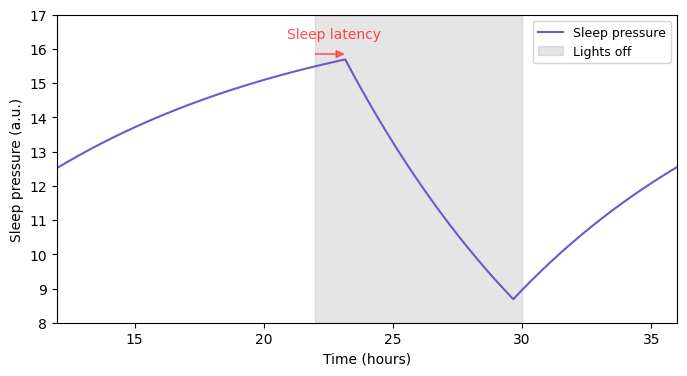

In [18]:
condition = 'chang14_ebook_first'
idx = selected_parameters.index[0]
daily_correction = 5*24
day_6_idx = np.where((time < 7*24) & (time > 5*24))[0]
data = np.load(f'data/chang14_selected_sleep_parameters/sleep_parameters_chang14_simulation_{idx}.npz', 
               allow_pickle=True)
trajectory = data[f'{condition}_trajectory_states']
x = time[day_6_idx] - daily_correction

fig, ax = plt.subplots(figsize=(8, 4))
pressure = ax.plot(x, trajectory[day_6_idx, 3], label='Sleep pressure',
                   color='slateblue')
ax.axvspan(22, 6 + 24, color='black', alpha=0.1, label='Lights off')
ax.set_xlim(12, 36)
ax.set_ylabel('Sleep pressure (a.u.)')
ax.set_xlabel('Time (hours)')
ax.arrow(22.0, 15.85, 1.1, 0, head_width=0.2, head_length=0.3, fc='r', ec='r',
         length_includes_head=True,
         alpha=0.5)
ax.set_ylim(8, 17)
ax.text(20.9, 16.3, 'Sleep latency', fontsize=10, color='red', alpha=0.7)
ax.legend(fontsize=9)

plt.show()

# Sleep latency histogram comparison

In [19]:
simulation_features

,day,simulation_condition,sleep_onset,sleep_duration,cbtmin,sleep_latency_minutes,daily_condition
simulation_idx,,,,,,,
4,1,regular,23.300,6.67,3.500,78.0,NaN
4,2,regular,23.300,6.67,3.500,78.0,NaN
4,3,regular,23.300,6.67,3.495,78.0,NaN
4,4,regular,23.300,6.67,3.495,78.0,NaN
4,5,regular,23.300,6.67,3.495,78.0,NaN
...,...,...,...,...,...,...,...
123,9,realistic_ebook_second,22.215,7.78,1.795,12.9,eBook
123,10,realistic_ebook_second,22.175,7.82,1.670,10.5,eBook
123,11,realistic_ebook_second,22.135,7.86,1.585,8.1,eBook


In [35]:
# Sleep latency at last condition day
scheduled_bedtime = 22.0
possible_days = (simulation_features['day'] == 6) | (simulation_features['day'] == 12)
possible_simulation_conditions = (simulation_features['simulation_condition'] == 'chang14_ebook_first') |  \
                                 (simulation_features['simulation_condition'] == 'chang14_ebook_second')
book_sleep_latency = simulation_features[possible_days & (simulation_features['daily_condition'] == 'Book') & 
                                         possible_simulation_conditions]['sleep_latency_minutes']

ebook_sleep_latency = simulation_features[possible_days & (simulation_features['daily_condition'] == 'eBook') &
                                          possible_simulation_conditions]['sleep_latency_minutes']

df = pd.DataFrame({
    'sleep_latency': np.concatenate([book_sleep_latency, ebook_sleep_latency]),
    'condition': ['Book'] * len(book_sleep_latency) + ['eBook'] * len(ebook_sleep_latency),
})

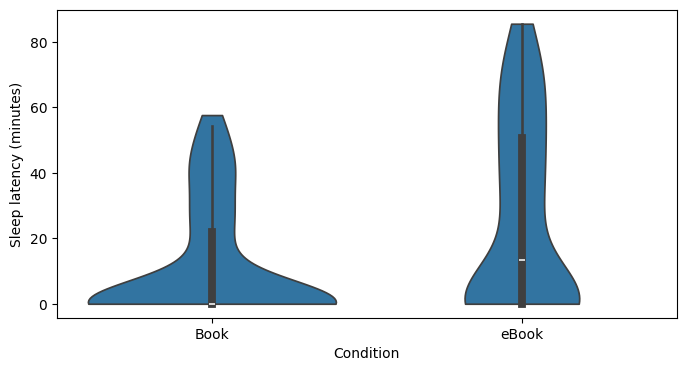

In [36]:
fig, ax = plt.subplots(figsize=(8, 4))
palette = {'Book': 'lightcoral', 'eBook': 'mediumpurple'}
sns.violinplot(x='condition', y='sleep_latency', data=df, ax=ax,
               cut=0, inner='box')
ax.set_ylabel('Sleep latency (minutes)')
ax.set_xlabel('Condition')
plt.show()

# Sleep duration

In [38]:
possible_days = (simulation_features['day'] == 6) | (simulation_features['day'] == 12)
possible_simulation_conditions = (simulation_features['simulation_condition'] == 'chang14_ebook_first') |  \
                                 (simulation_features['simulation_condition'] == 'chang14_ebook_second')
book_sleep_duration = simulation_features[possible_days & (simulation_features['daily_condition'] == 'Book') &
                                          possible_simulation_conditions]['sleep_duration']
ebook_sleep_duration = simulation_features[possible_days & (simulation_features['daily_condition'] == 'eBook') &
                                           possible_simulation_conditions]['sleep_duration']

df = pd.DataFrame({
    'sleep_duration': np.concatenate([book_sleep_duration, ebook_sleep_duration]),
    'condition': ['Book'] * len(book_sleep_duration) + ['eBook'] * len(ebook_sleep_duration),
})

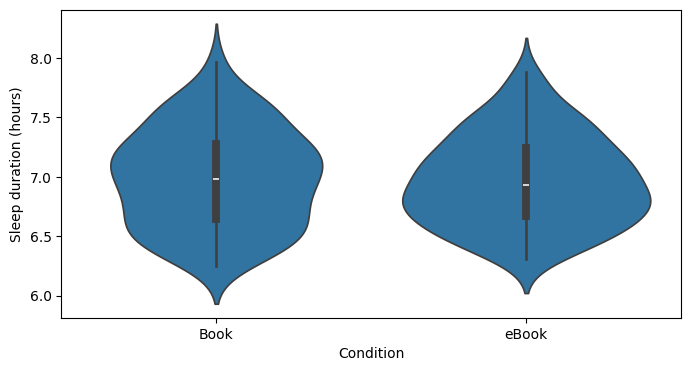

In [39]:
# seabron violin
fig, ax = plt.subplots(figsize=(8, 4))

sns.violinplot(x='condition', y='sleep_duration', data=df, ax=ax,
               inner='box')
ax.set_ylabel('Sleep duration (hours)')
ax.set_xlabel('Condition')
plt.show()

# Mean sleep onset evolution

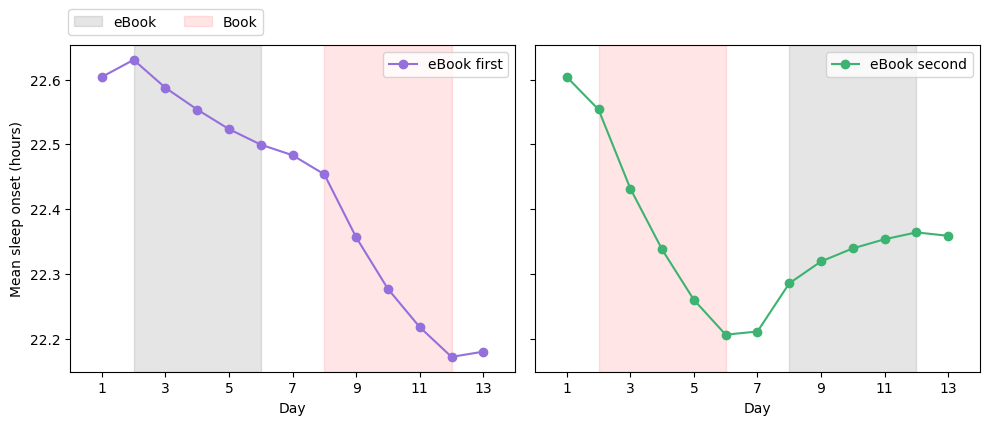

In [41]:
ebook_first = simulation_features[simulation_features['simulation_condition'] == 'chang14_ebook_first']
ebook_second = simulation_features[simulation_features['simulation_condition'] == 'chang14_ebook_second']

ebook_first_sleep_onset = ebook_first.groupby('day')['sleep_onset'].mean()
ebook_second_sleep_onset = ebook_second.groupby('day')['sleep_onset'].mean()

days = np.arange(1, 14)

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

axs[0].plot(days, ebook_first_sleep_onset,
            marker='o', color='mediumpurple', label='eBook first')
axs[0].legend()
axs[0].axvspan(2, 6, color='black', alpha=0.1, label='eBook')
axs[0].axvspan(8, 12, color='red', alpha=0.1, label='Book')

axs[1].plot(days, ebook_second_sleep_onset,
            marker='o', color='mediumseagreen', label='eBook second')
axs[1].legend()
axs[1].axvspan(2, 6, color='red', alpha=0.1)
axs[1].axvspan(8, 12, color='black', alpha=0.1)

axs[0].set_xlim(0, 14)
axs[1].set_xlim(0, 14)
axs[0].set_xticks(days[::2])
axs[1].set_xticks(days[::2])

axs[0].set_ylabel('Mean sleep onset (hours)')
axs[0].set_xlabel('Day')
axs[1].set_xlabel('Day')

# create legend outside of the plot
handles, labels = axs[0].get_legend_handles_labels()
handles = handles[1:]
labels = labels[1:]
fig.legend(handles, labels, loc='center right',
           bbox_to_anchor=(0.275, 1.02), ncol=2)

plt.tight_layout()
plt.show()

# Mean sleep duration evolution

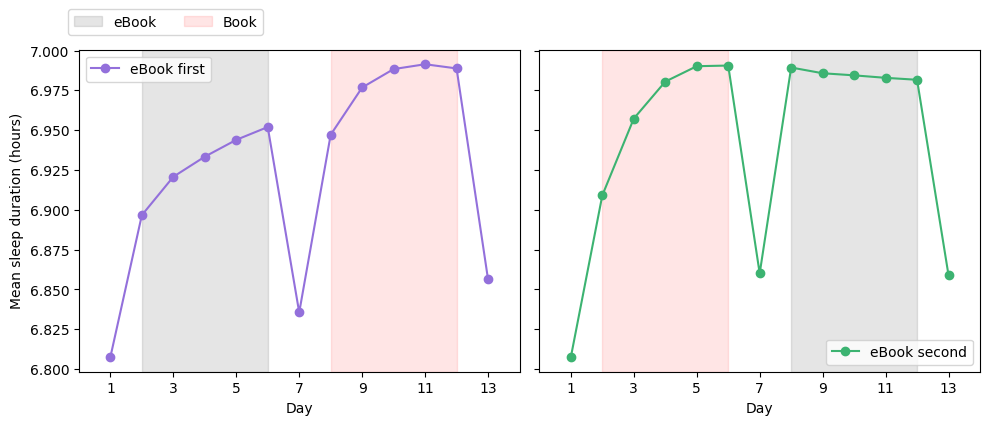

In [42]:
ebook_first = simulation_features[simulation_features['simulation_condition'] == 'chang14_ebook_first']
ebook_second = simulation_features[simulation_features['simulation_condition'] == 'chang14_ebook_second']

ebook_first_sleep_duration = ebook_first.groupby('day')['sleep_duration'].mean()
ebook_second_sleep_duration = ebook_second.groupby('day')['sleep_duration'].mean()

days = np.arange(1, 14)

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

axs[0].plot(days, ebook_first_sleep_duration,
            marker='o', color='mediumpurple', label='eBook first')
axs[0].legend()
axs[0].axvspan(2, 6, color='black', alpha=0.1, label='eBook')
axs[0].axvspan(8, 12, color='red', alpha=0.1, label='Book')

axs[1].plot(days, ebook_second_sleep_duration,
            marker='o', color='mediumseagreen', label='eBook second')
axs[1].legend()
axs[1].axvspan(2, 6, color='red', alpha=0.1)
axs[1].axvspan(8, 12, color='black', alpha=0.1)

axs[0].set_xlim(0, 14)
axs[1].set_xlim(0, 14)
axs[0].set_xticks(days[::2])
axs[1].set_xticks(days[::2])

axs[0].set_ylabel('Mean sleep duration (hours)')
axs[0].set_xlabel('Day')
axs[1].set_xlabel('Day')

# create legend outside of the plot
handles, labels = axs[0].get_legend_handles_labels()
handles = handles[1:]
labels = labels[1:]
fig.legend(handles, labels, loc='center right',
           bbox_to_anchor=(0.275, 1.02), ncol=2)

plt.tight_layout()
plt.show()